In [41]:
import numpy as np
import pandas as pd
import pickle
#import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
#Retrieve pickle object
fileObj = open('data_algos.pkl', 'rb')
all_generations = pickle.load(fileObj)
fileObj.close()

In [43]:
#creating one DataFrame for each selection method
#random_df = pd.DataFrame(all_generations[0])
#ranked_df = pd.DataFrame(all_generations[1])
#wheel_df = pd.DataFrame(all_generations[2])
#concatenating all dataframes (same dimensionality)
generations_df = pd.DataFrame(all_generations)
#checking the results
generations_df.sample(5)

,radius,generation,fitness,selection_type,gen_size
15690,0.235294,156,0.003916,Random Selection,100
149223,1.647059,492,0.018701,Wheel Selection,100
130287,1.647059,302,0.018701,Wheel Selection,100
120236,1.647059,202,0.018701,Wheel Selection,100
130573,1.647059,305,0.018701,Wheel Selection,100


In [44]:
#Sample Statistics
generations_df.groupby(by=['selection_type', 'generation']).describe(percentiles = [0.5])


radius                                     \
                             count       mean           std       min   
selection_type   generation                                             
Random Selection 0           100.0  16.182353  9.265506e+00  0.235294   
                 1           100.0  16.304706  9.392063e+00  0.588235   
                 2           100.0  16.347059  9.295259e+00  1.058824   
                 3           100.0  15.964706  9.298464e+00  0.588235   
                 4           100.0  15.551765  9.084686e+00  0.235294   
...                            ...        ...           ...       ...   
Wheel Selection  495         100.0   1.647059  4.463264e-16  1.647059   
                 496         100.0   1.647059  4.463264e-16  1.647059   
                 497         100.0   1.647059  4.463264e-16  1.647059   
                 498         100.0   1.647059  4.463264e-16  1.647059   
                 499         100.0   1.647059  4.463264e-16  1.647059   

                                                  fitness            \
                                   50%        max   count      mean   
selection_type   generation                                           
Random Selection 0           17.941176  29.764706   100.0  0.003042   
                 1           18.411765  29.764706   100.0  0.003393   
                 2           18.647059  29.647059   100.0  0.003363   
                 3           18.000000  29.882353   100.0  0.003202   
                 4           16.000000  27.764706   100.0  0.002881   
...                                ...        ...     ...       ...   
Wheel Selection  495          1.647059   1.647059   100.0  0.018701   
                 496          1.647059   1.647059   100.0  0.018701   
                 497          1.647059   1.647059   100.0  0.018701   
                 498          1.647059   1.647059   100.0  0.018701   
                 499          1.647059   1.647059   100.0  0.018701   

                                                                         \
                                      std       min       50%       max   
selection_type   generation                                               
Random Selection 0           5.309940e-03  0.000180  0.000494  0.018701   
                 1           5.711393e-03  0.000180  0.000469  0.018701   
                 2           5.619538e-03  0.000181  0.000457  0.018668   
                 3           4.952270e-03  0.000178  0.000490  0.018543   
                 4           4.484417e-03  0.000206  0.000620  0.018543   
...                                   ...       ...       ...       ...   
Wheel Selection  495         3.486925e-18  0.018701  0.018701  0.018701   
                 496         3.486925e-18  0.018701  0.018701  0.018701   
                 497         3.486925e-18  0.018701  0.018701  0.018701   
                 498         3.486925e-18  0.018701  0.018701  0.018701   
                 499         3.486925e-18  0.018701  0.018701  0.018701   

                            gen_size                                   
                               count   mean  std    min    50%    max  
selection_type   generation                                            
Random Selection 0             100.0  100.0  0.0  100.0  100.0  100.0  
                 1             100.0  100.0  0.0  100.0  100.0  100.0  
                 2             100.0  100.0  0.0  100.0  100.0  100.0  
                 3             100.0  100.0  0.0  100.0  100.0  100.0  
                 4             100.0  100.0  0.0  100.0  100.0  100.0  
...                              ...    ...  ...    ...    ...    ...  
Wheel Selection  495           100.0  100.0  0.0  100.0  100.0  100.0  
                 496           100.0  100.0  0.0  100.0  100.0  100.0  
                 497           100.0  100.0  0.0  100.0  100.0  100.0  
                 498           100.0  100.0  0.0  100.0  100.0  100.0  
                 499   

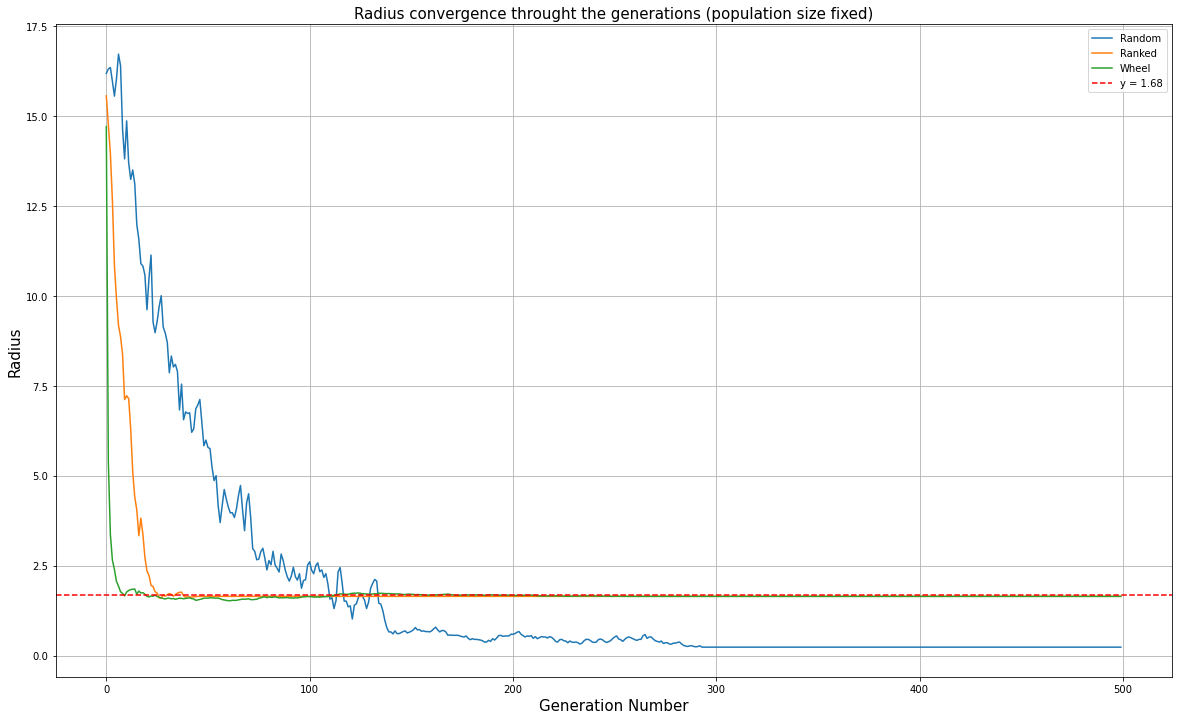

In [45]:
grouped = generations_df.groupby(by=['selection_type', 'generation']).mean()
#create plots

plt.rcParams["figure.figsize"]=(20,12)

x1 = range(len(grouped.loc['Random Selection', 'fitness']))
y1 = grouped.loc['Random Selection', 'radius']
y2 = grouped.loc['Ranked Selection', 'radius']
y3 = grouped.loc['Wheel Selection', 'radius']

plt.title('Radius convergence throught the generations (population size fixed)',fontsize=15)
plt.xlabel('Generation Number',fontsize=15)
plt.ylabel('Radius',fontsize=15)

plt.plot(x1,y1,label = 'Random')
plt.plot(x1,y2,label = 'Ranked') 
plt.plot(x1,y3, label = 'Wheel')  
plt.grid()
plt.axhline(y=1.6841, color='r', linestyle='--', label='y = 1.68')
plt.legend()

plt.show()

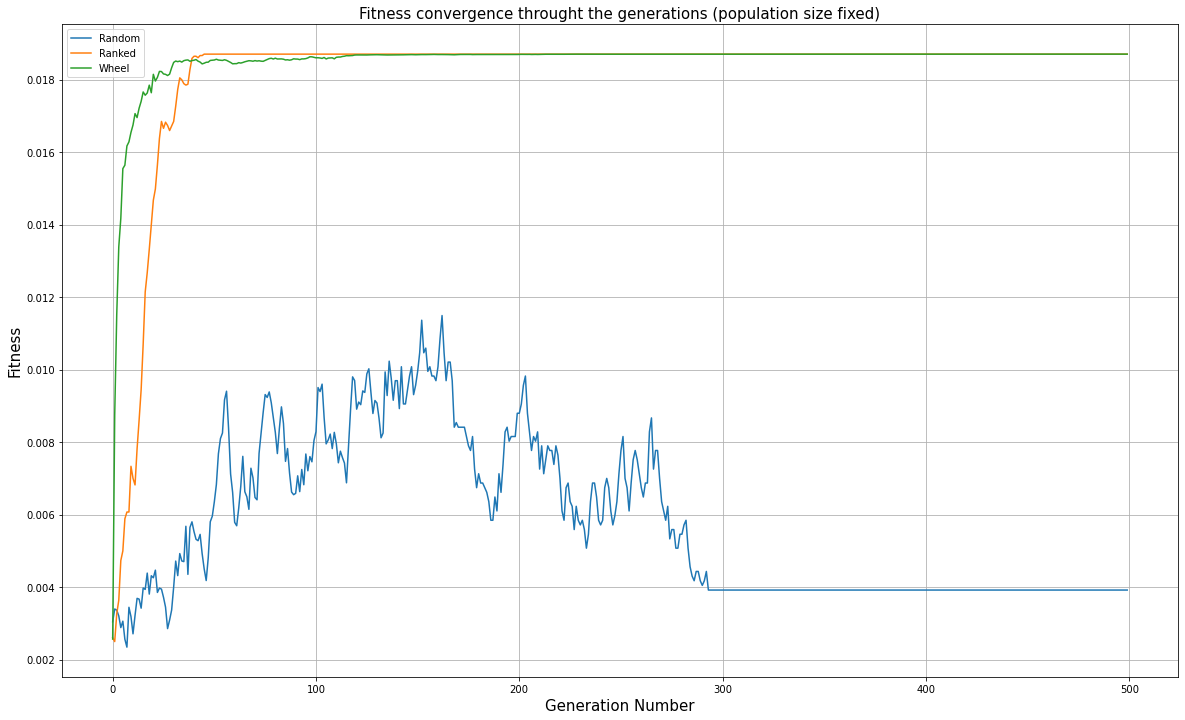

In [46]:
grouped = generations_df.groupby(by=['selection_type', 'generation']).mean()
#create plots

plt.rcParams["figure.figsize"]=(20,12)

x1 = range(len(grouped.loc['Random Selection', 'fitness']))
y1 = grouped.loc['Random Selection', 'fitness']
y2 = grouped.loc['Ranked Selection', 'fitness']
y3 = grouped.loc['Wheel Selection', 'fitness']

plt.title('Fitness convergence throught the generations (population size fixed)',fontsize=15)
plt.xlabel('Generation Number',fontsize=15)
plt.ylabel('Fitness',fontsize=15)

plt.plot(x1,y1,label = 'Random')
plt.plot(x1,y2,label = 'Ranked') 
plt.plot(x1,y3, label = 'Wheel')  
plt.grid()
plt.legend()

plt.show()